Aprendizado supervisionado;  
Problema: Regressão

Classificação binária (IS Holiday) e multi-classe   
Dados numéricos e Time-Series

Target: Weekly_Sales --> total_sales (por data e por loja)

In [6]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# dates and times

import datetime
from datetime import date
from datetime import datetime

In [7]:
features = pd.read_csv(r"C:\VS\fea_dev\passados\IA\case_IA.ipynb\Features data set.csv")
sales = pd.read_csv(r"C:\VS\fea_dev\passados\IA\case_IA.ipynb\sales data-set.csv")
stores = pd.read_csv(r"C:\VS\fea_dev\passados\IA\case_IA.ipynb\stores data-set.csv")

In [8]:
sales = sales.sort_values("Date", ascending=False)
sales["Date"]

404092    31/12/2010
91966     31/12/2010
341181    31/12/2010
416393    31/12/2010
123735    31/12/2010
             ...    
286751    01/04/2011
65225     01/04/2011
184906    01/04/2011
392696    01/04/2011
363425    01/04/2011
Name: Date, Length: 421570, dtype: object

In [9]:
df = features.merge(sales, on=('Date', 'IsHoliday', 'Store')).merge(stores, on='Store')
df["Date"] = pd.to_datetime(df["Date"], format= '%d/%m/%Y')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,80,15694.17,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,10,30721.50,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,81,30052.75,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,30,5491.00,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,25,11609.50,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,83,717.82,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,80,670.88,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,90,25352.32,B,118221


Como o objetivo é analisar por loja, vamos somar as vendas semanais de cada data de todos os departamentos de uma mesma loja

In [10]:
store_sales = [*df.groupby(["Store","Date"])["Weekly_Sales"].sum()]

print(store_sales)
print(len(store_sales))

#df = df.drop(columns=['Dept','Weekly_Sales'])
#df = df.drop_duplicates()

#df['store_sales'] = store_sales

[1643690.9, 1641957.44, 1611968.17, 1409727.59, 1554806.68, 1439541.59, 1472515.79, 1404429.92, 1594968.28, 1545418.53, 1466058.28, 1391256.12, 1425100.71, 1603955.1199999999, 1494251.5, 1399662.07, 1432069.95, 1615524.71, 1542561.09, 1503284.06, 1422711.6, 1492418.1400000001, 1546074.18, 1448938.92, 1385065.2, 1371986.6, 1605491.78, 1508237.76, 1513080.49, 1449142.92, 1540163.53, 1507460.69, 1430378.67, 1351791.03, 1453329.5, 1508239.93, 1459409.1, 1345454.0, 1384209.22, 1551659.28, 1494479.49, 1483784.18, 1955624.11, 1548033.78, 1682614.26, 1891034.93, 2387950.2, 1367320.01, 1444732.28, 1391013.96, 1327405.42, 1316899.31, 1606629.58, 1649614.93, 1686842.78, 1456800.28, 1636263.41, 1553191.6300000001, 1576818.06, 1541102.3800000001, 1495064.75, 1614259.35, 1559889.0, 1564819.81, 1455090.69, 1629391.28, 1604775.58, 1428218.27, 1466046.67, 1635078.41, 1588948.32, 1532114.86, 1438830.15, 1488538.09, 1534849.64, 1455119.97, 1396926.82, 1352219.79, 1624383.75, 1525147.09, 1530761.43, 14646

Pronto!!! Agora temos um df por data e por loja

Agora vamos vereficar onde há valores nulos:

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
MarkDown2,310322,73.6
MarkDown4,286603,68.0
MarkDown3,284479,67.5
MarkDown1,270889,64.3
MarkDown5,270138,64.1
Store,0,0.0
Date,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0


In [12]:
df = df.fillna(0)

Agora é preciso transformar alguns valores pra funcionarem na IA: 

Date: week of year       
Temperature: grupos     
Fuel_Price: grupos  
Markdowns: grupos   
CPI: grupos      
Unemployment: grupos  
Type: [A:1, B:2, C:3]  
Size: grupos (Type?)    

<AxesSubplot: xlabel='Date', ylabel='Temperature'>

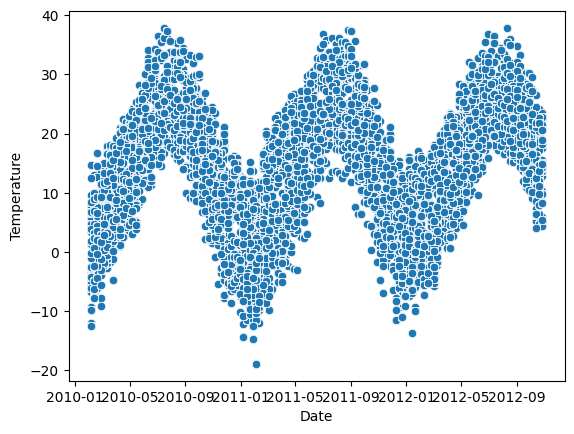

In [13]:
# Primeiro vou transformar a temperatura de Fahrenheit para Celsius
df['Temperature'] = df['Temperature'].apply(lambda x: (x-32)*5/9)

sns.scatterplot(data=df, x=df["Date"], y=df["Temperature"])

In [14]:
# Podemos ver que a temperatura, agora em celsius, varia bastante, de quase -20 a 40 (sendo o país provavelmente o Canadá e talvez Reino Unido, considerando um único país em que as lojas estão estabelecidas)
# Transformando a temperatura em faixas que variam a cada 10 graus, de 0 a 5

df['Temperature'] = df['Temperature'].astype(int)

<AxesSubplot: xlabel='Date', ylabel='Fuel_Price'>

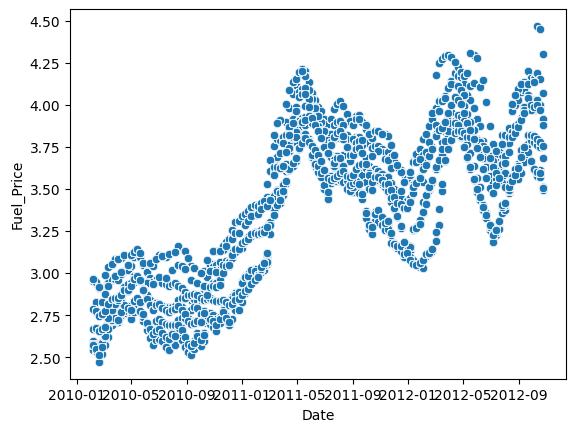

In [15]:
# Fuel_Price:
sns.scatterplot(data=df, x=df["Date"], y=df["Fuel_Price"])

In [16]:
# Os preços de combustíveis variam de apx. 2.50 até 4.50. Vou dividir em 4 categorias que captam suficientemente as variações de preço de combustível

df['Fuel_Price'] = df['Fuel_Price'].round(decimals=2)

<AxesSubplot: xlabel='Date', ylabel='MarkDown1'>

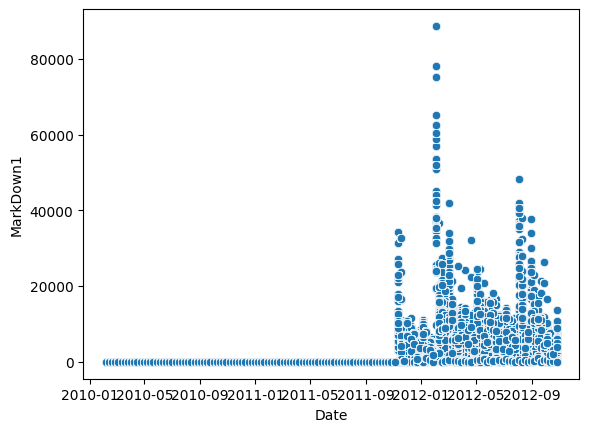

In [17]:
sns.scatterplot(data=df, x=df["Date"], y=df["MarkDown1"])

In [18]:
# Aqui eu descubro que não há markdowns nos anos de 2010 e 2011. Isso pode dar um baita problema pro algoritmo, especialmente depois de separarmos os dados para teste e treinamento. Melhor abandonar os markdowns

df = df.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,5,2.57,211.096358,8.106,False,80,15694.17,A,151315
1,1,2010-02-05,5,2.57,211.096358,8.106,False,10,30721.50,A,151315
2,1,2010-02-05,5,2.57,211.096358,8.106,False,81,30052.75,A,151315
3,1,2010-02-05,5,2.57,211.096358,8.106,False,30,5491.00,A,151315
4,1,2010-02-05,5,2.57,211.096358,8.106,False,25,11609.50,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,14,3.88,192.308899,8.667,False,93,2487.80,B,118221
421566,45,2012-10-26,14,3.88,192.308899,8.667,False,83,717.82,B,118221
421567,45,2012-10-26,14,3.88,192.308899,8.667,False,80,670.88,B,118221
421568,45,2012-10-26,14,3.88,192.308899,8.667,False,90,25352.32,B,118221


<AxesSubplot: xlabel='Date', ylabel='CPI'>

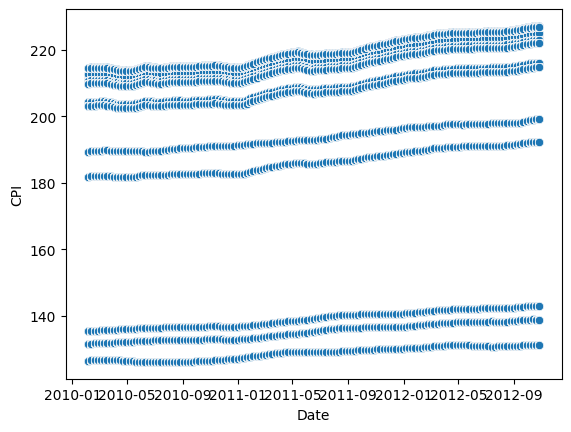

In [19]:
# CPI
sns.scatterplot(data=df, x=df["Date"], y=df["CPI"])

In [20]:
# Aparentemente, as lojas estão diferenciadas em 11 localidades que calculam seu próprio CPI. Aqui só faz sentido agrupar em 3 grupos
df['CPI'] = df['CPI'].round(decimals=2)

<AxesSubplot: xlabel='Date', ylabel='Unemployment'>

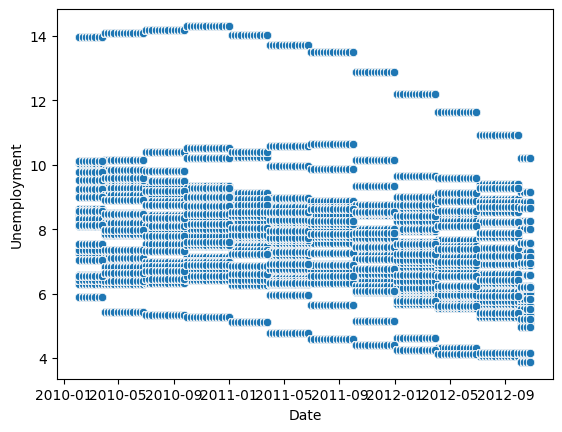

In [21]:
# Unemployment
sns.scatterplot(data=df, x=df["Date"], y=df["Unemployment"])

In [22]:
df['Unemployment'] = df['Unemployment'].round(decimals=2)

<AxesSubplot: xlabel='Store', ylabel='Size'>

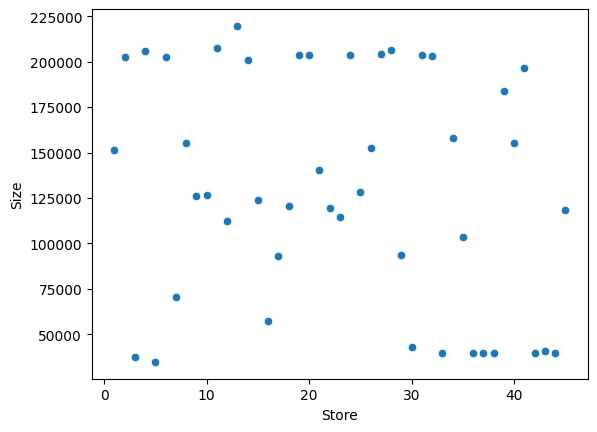

In [23]:
# Size e Type
# Os tamanhos das lojas já estão representadas em Type, mas Type pode subjulgar a diferença de tamanho das lojas:
sns.scatterplot(data=df, x=df["Store"], y=df["Size"])

In [24]:
df = df.drop(columns='Type')

df.loc[ df['Size'] <= 75000, 'Size'] = 0
df.loc[(df['Size'] > 75000) & (df['Size'] <= 125000), 'Size'] = 1
df.loc[(df['Size'] > 125000) & (df['Size'] <= 175000), 'Size'] = 2
df.loc[ df['Size'] > 175000, 'Size'] = 3
df['Size'] = df['Size'].astype(int)

In [25]:
# E por fim, transformar Weekly_Sales em int
df["Weekly_Sales"] = df["Weekly_Sales"].astype(int)
df = df.sort_values(['Date','Store'])
df

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size
0,1,2010-02-05,5,2.57,211.10,8.11,False,80,15694,2
1,1,2010-02-05,5,2.57,211.10,8.11,False,10,30721,2
2,1,2010-02-05,5,2.57,211.10,8.11,False,81,30052,2
3,1,2010-02-05,5,2.57,211.10,8.11,False,30,5491,2
4,1,2010-02-05,5,2.57,211.10,8.11,False,25,11609,2
...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,14,3.88,192.31,8.67,False,93,2487,1
421566,45,2012-10-26,14,3.88,192.31,8.67,False,83,717,1
421567,45,2012-10-26,14,3.88,192.31,8.67,False,80,670,1
421568,45,2012-10-26,14,3.88,192.31,8.67,False,90,25352,1


In [26]:
# Essa é a "versão final" do df que vamos utilizar para o algoritmo. Vamos separar ele em 2 partes: treino (75%), e teste (25%). Como estamos trabalhando com uma série temporal, a melhor métrica pode ser dividir em relação ao tempo.

train = df[(df['Date'] <= '2012-04-06')].copy()
test = df[(df['Date'] > '2012-04-06')].copy()

# train
X_train = train.drop("Weekly_Sales", axis=1).copy()
Y_train = train["Weekly_Sales"]

X_test = test.drop("Weekly_Sales", axis=1).copy()
Y_test = test['Weekly_Sales']


In [27]:
# Vamos testar com os seguintes algoritmos: 
# Stochastic Gradient Descent - SGD (Regressor),
# RegLin: Lasso e Elastic Net,
# Random Forest/ Decision Tree

In [30]:
'''# Stochastic Gradient Descent - SGD (Regressor)
sgd = linear_model.SGDRegressor(loss='squared_error', max_iter=1000)
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(acc_sgd)'''

"# Stochastic Gradient Descent - SGD (Regressor)\nsgd = linear_model.SGDRegressor(loss='squared_error', max_iter=1000)\nsgd.fit(X_train,Y_train)\nY_pred = sgd.predict(X_test)\n\nsgd.score(X_train, Y_train)\n\nacc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)\nprint(acc_sgd)"

In [32]:
'''# RegLin: Lasso
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
lasso.predict(X_test)

lasso.score(X_train, Y_train)

acc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)
print(acc_lasso)'''

'# RegLin: Lasso\nlasso = linear_model.Lasso(alpha=0.1)\nlasso.fit(X_train,Y_train)\nlasso.predict(X_test)\n\nlasso.score(X_train, Y_train)\n\nacc_lasso = round(lasso.score(X_train, Y_train) * 100, 2)\nprint(acc_lasso)'

In [34]:
'''# Elastic Net
elasticnet = linear_model.ElasticNet()
elasticnet.fit(X_train,Y_train)
elasticnet.predict(X_test)

elasticnet.score(X_train, Y_train)
acc_elasticnet = round(elasticnet.score(X_train, Y_train) * 100, 2)
print(acc_elasticnet)'''

'# Elastic Net\nelasticnet = linear_model.ElasticNet()\nelasticnet.fit(X_train,Y_train)\nelasticnet.predict(X_test)\n\nelasticnet.score(X_train, Y_train)\nacc_elasticnet = round(elasticnet.score(X_train, Y_train) * 100, 2)\nprint(acc_elasticnet)'

In [35]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)
"Features data set.csv"
# Demora muito

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>)

In [36]:
# Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)

acc_tree = round(dtree.score(X_train, Y_train) * 100, 2)
test_acc_tree = round(dtree.score(X_test, Y_test) * 100, 2)
print(acc_tree)
print(test_acc_tree)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[bool_]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int32]'>)

In [ ]:
importances = pd.DataFrame({
    'feature':X_train.columns,'importance':np.round(tree.feature_importances_, 3)
    })
importances = importances.sort_values('importance',ascending=False)
importances

ValueError: All arrays must be of the same length

In [ ]:
df = df.drop(columns=['Temperature','IsHoliday','Unemployment','Fuel_Price'])

train = df[(df['Date'] <= 106)].copy()
test = df[(df['Date'] > 106)].copy()

# train
X_train = train.drop("Weekly_Sales", axis=1).copy()
Y_train = train["Weekly_Sales"]

X_test = test.drop("Weekly_Sales", axis=1).copy()
Y_test = test['Weekly_Sales']

In [ ]:
# Aparentemente, cross-validation (as mais comuns) não fazem muito sentido em time-series pois não há sentido em tentar prever dados passados com futuros, portanto, irei pular essa etapa
# fiquei mttt perdido em hiperparâmetros, minha sensação é que eu não devia fazer nada disso pq eu não tinha ideia da estatística por trás

In [ ]:
# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)

acc_tree = round(tree.score(X_train, Y_train) * 100, 2)
test_acc_tree = round(tree.score(X_test, Y_test) * 100, 2)
print(acc_tree)
print(test_acc_tree)

100.0
86.92


In [ ]:
# Tunagem de Hiperparâmetros
# fiquei mttt perdido em hiperparâmetros, minha sensação é que eu não devia fazer nada disso pq eu não tinha ideia da estatística por trás
param_grid = { "criterion" : ["squared_error"], "min_samples_leaf" : [1, 2, 4, 5, 8, 10, 15, 20], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 30, 35,38, 40]}

rf = DecisionTreeRegressor(max_features='auto', random_state=42)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeRegressor(max_features='auto',
                                             random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'min_samples_leaf': [1, 2, 4, 5, 8, 10, 15, 20],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 30, 35,
                                               38, 40]})

In [ ]:
clf.best_params_

{'criterion': 'squared_error', 'min_samples_leaf': 15, 'min_samples_split': 2}

In [ ]:
param_grid = { "criterion" : ["squared_error"], "min_samples_leaf" : [1, 2, 3, 4, 5], "min_samples_split" : [35, 36, 37, 38, 39, 40], 
"max_depth": [None, 5, 10], "max_features": ['auto', None], "splitter": ['best','random']
}

rf = DecisionTreeRegressor(max_features='auto', random_state=42)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeRegressor(max_features='auto',
                                             random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [35, 36, 37, 38, 39, 40],
                         'splitter': ['best', 'random']})

In [ ]:
clf.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 39,
 'splitter': 'random'}

In [ ]:
#{'max_depth': 7,
#'max_features': 'auto',
#'max_leaf_nodes': None,
#'min_samples_leaf': 1,
#'min_weight_fraction_leaf': 0.1,
#'splitter': 'best'}

best_dtree = DecisionTreeRegressor(criterion='squared_error',
 max_depth=None,
 max_features='auto',
 min_samples_leaf=4,
 min_samples_split=40,
 splitter='random')
best_dtree.fit(X_train, Y_train)
Y_pred = best_dtree.predict(X_test)

acc_btree = round(best_dtree.score(X_train, Y_train) * 100, 2)
test_acc_btree = round(best_dtree.score(X_test, Y_test) * 100, 2)
print(acc_btree)
print(test_acc_btree)

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


90.53
90.97


In [ ]:
# eeee bem melhor
print(metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square Error :%.3f' % np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print(metrics.r2_score(Y_test, Y_pred))

43892021.58150343
Root Mean Square Error :6625.105
0.9096741803684418


In [ ]:
Y_pred = Y_pred.astype(int)
test["Y_pred"] = Y_pred
test

,Store,Date,CPI,Dept,Weekly_Sales,Size,Y_pred
7673,1,107,2,46,21075,2,22254
7674,1,107,2,37,2952,2,2693
7675,1,107,2,38,72314,2,79068
7676,1,107,2,97,32002,2,34681
7677,1,107,2,7,15956,2,17028
...,...,...,...,...,...,...,...
421565,45,142,1,93,2487,1,1883
421566,45,142,1,83,717,1,632
421567,45,142,1,80,670,1,448
421568,45,142,1,90,25352,1,25611


In [ ]:
print(Y_pred)

[22254  2693 79068 ...   448 25611  6334]


In [ ]:
store_sales = [*test.groupby(["Store","Date"])["Weekly_Sales"].sum()]
pred_sales = [*test.groupby(["Store","Date"])["Y_pred"].sum()]

print(len(store_sales))
print(len(pred_sales))

test2 = test.copy()

test2 = test2.drop(columns=['Dept','Weekly_Sales','Y_pred'])
test2 = test2.drop_duplicates()

test2['store_sales'] = store_sales
test2['pred_sales'] = pred_sales

test2

1620
1620


,Store,Date,CPI,Size,store_sales,pred_sales
7673,1,107,2,2,1539351,1586965
17907,2,107,2,3,1688391,1586965
27246,3,107,2,0,1675400,1586417
37200,4,107,0,3,1677440,1586249
46541,5,107,2,0,1511034,1586417
...,...,...,...,...,...,...
390988,41,142,1,3,713141,820222
397961,42,142,0,0,733424,820261
404716,43,142,2,0,734434,820222
411878,44,142,0,0,718096,820222


<AxesSubplot: xlabel='Date', ylabel='pred_sales'>

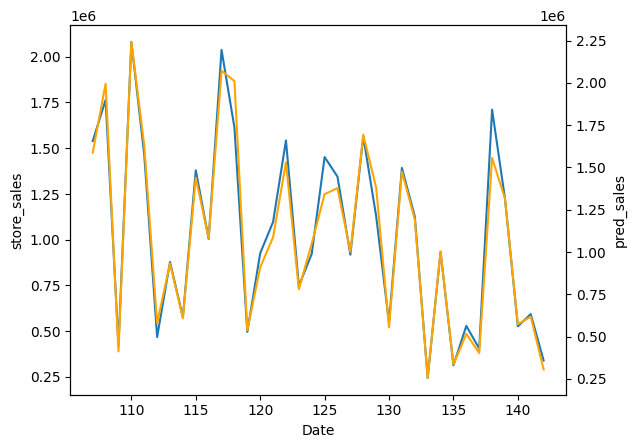

In [ ]:
# Store 1 sales
sns.lineplot(data=test2[(test2['Store']==1)], x='Date', y='store_sales')
ax2 = plt.twinx()
sns.lineplot(data=test2[(test2['Store']==1)],x='Date', y='pred_sales', color="orange", ax=ax2)

In [ ]:
# Company sales 
comp_sales = [*test2.groupby(["Date"])["store_sales"].sum()]
pred_comp_sales = [*test2.groupby(["Date"])["pred_sales"].sum()]

print(len(comp_sales))
print(len(pred_comp_sales))

comp = pd.DataFrame({
    "Date": test2["Date"].unique(),
    "comp_sales": comp_sales,
    "pred_comp_sales": pred_comp_sales
})

comp

36
36


,Date,comp_sales,pred_comp_sales
0,107,74506396,74954902
1,108,58819177,61200081
2,109,66215129,68008844
3,110,31001746,32073062
4,111,61380536,63642493
5,112,32560837,32633931
6,113,31546797,33356737
7,114,70242725,76086803
8,115,58494575,61493113
9,116,63265076,66476180


<AxesSubplot: xlabel='Date', ylabel='pred_comp_sales'>

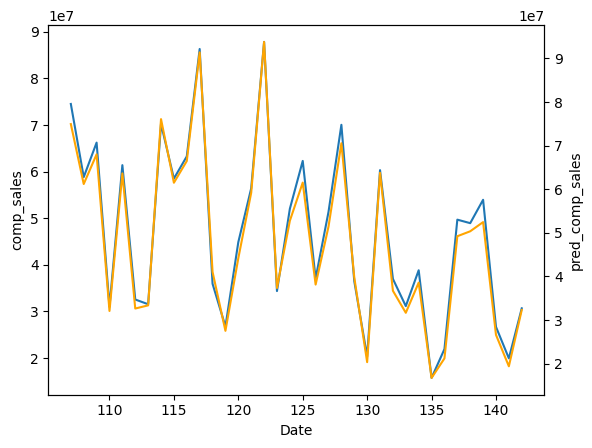

In [ ]:
# Company sales plot
sns.lineplot(data=comp, x='Date', y='comp_sales')
ax2 = plt.twinx()
sns.lineplot(data=comp ,x='Date', y='pred_comp_sales', color="orange", ax=ax2)